## Начальные условия:

alpha - угол броска

V0 - начальная скорость камня


## Параметры

m - масса камня

S1 - расстояние от Робин Гуда до стены

L - длина бойницы

H_loophole - расстояние от земли до бойницы

h_loophole - высота бойницы

S2 - расстояние от стены до замка

H_window - расстояние от земли до окна

h_window - высота окна


## События

1: камень упал на землю, не долетев до окна (либо до, либо после стены)

2: камень не попал в бойницу (ударился о стену)

3.1: камень застрял в бойнице (стукнулся о «пол» бойницы)

3.2: камень застрял в бойнице (стукнулся о «потолок» бойницы)

4: камень стукнулся о стену замка (не попав в окно)

5: камень попал в окно

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from matplotlib.patches import Rectangle
g = 9.81

In [13]:
def func(S1, L, H_loophole, h_loophole, S2, H_window, h_window, alpha, V0):
    
    def stone(t,y):
        return [y[2], y[3], 0, -g]
     
    def event_1(t,y):
        return y[1]    

    def event_2(t,y):
        return  y[0] - S1

    def event_3_1(t,y):
        return y[1] - H_loophole    
    
    def event_3_2(t,y):
        return y[1] - (H_loophole + h_loophole)
   
    def event_4(t,y):
        return  y[0] - (S1 + L + S2)
    
    
    def event_5(t,y):
        return  y[0] - (S1 + L + S2 + 0.2)


    event_1.terminal  = True
    event_1.direction = -1
    
    tg = math.tan(alpha)
    a = g/(2*(V0**2)*(math.cos(alpha))**2)
  
    F2 = tg*S1- a*(S1**2)
    if F2 > H_loophole and F2 < H_loophole + h_loophole:
        event_2.terminal = False
    else:
        event_2.terminal = True
         
            
    discr1 = tg ** 2 - 4 * a * H_loophole
    discr2 = tg ** 2 - 4 * a * (H_loophole + h_loophole)
    
    def FUNC(discr,event):
        if discr > 0:
            x1 = (-tg + math.sqrt(discr)) / (-2 * a)
            x2 = (-tg - math.sqrt(discr)) / (-2 * a)
            if (x1 > S1 and x1 < S1 + L) or (x2 > S1 and x2 < S1 + L):
                event.terminal  = True
                event_3_1.direction = -1
        elif discr == 0:
            x = -tg / (-2 * a)
            if x > S1 and x< S1 + L:
                event.terminal  = True
                event_3_1.direction = -1
        else:
            event.terminal  = False

    FUNC(discr1,event_3_1)
    FUNC(discr2,event_3_2)

    
    F4 = tg*(S1 + L + S2)- a*((S1 + L + S2)**2)
    if F4 > H_window and F4 < H_window + h_window:
        event_5.terminal = True
    else:
        event_4.terminal = True
        

    t = np.linspace(0, 100, 10000)
    sol = integrate.solve_ivp(stone, [0, 100], [0, 0, V0 * math.cos(alpha), V0 * math.sin(alpha)], t_eval = t, dense_output=True, 
                              events=[event_1,event_2,event_3_1,event_3_2,event_4,event_5])
    plt.figure(figsize = (20, 10))
    plt.xlim(-5, 30)
    plt.ylim(-5, 30)
    plt.plot(sol.y[0,:], sol.y[1,:])
    plt.plot(0,0,'ro')
    plt.plot(sol.y[0,-1],sol.y[1,-1],'ro')
    plt.xlabel('x')
    plt.ylabel('y')
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((S1,0), L, H_loophole, facecolor="lightgreen"))
    currentAxis.add_patch(Rectangle((S1, H_loophole+h_loophole), L, 1000, facecolor="lightgreen"))
    currentAxis.add_patch(Rectangle((S1+L+S2, 0), 20, 1000, facecolor="lightgreen"))
    currentAxis.add_patch(Rectangle((S1+L+S2, H_window), 0.6, h_window, facecolor="white")) #окно
    plt.grid()

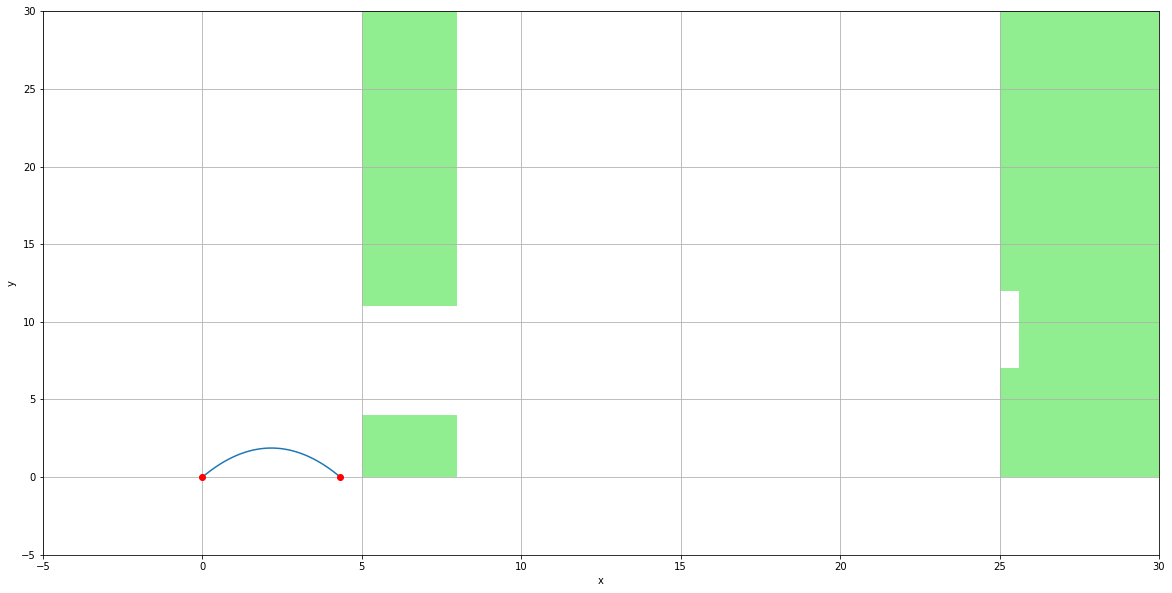

In [14]:
# 1
V0 = 7
alpha = 60
alpha = math.radians(alpha)
func(5,  3,  4,  7,  17,  7,  5,  alpha, V0)

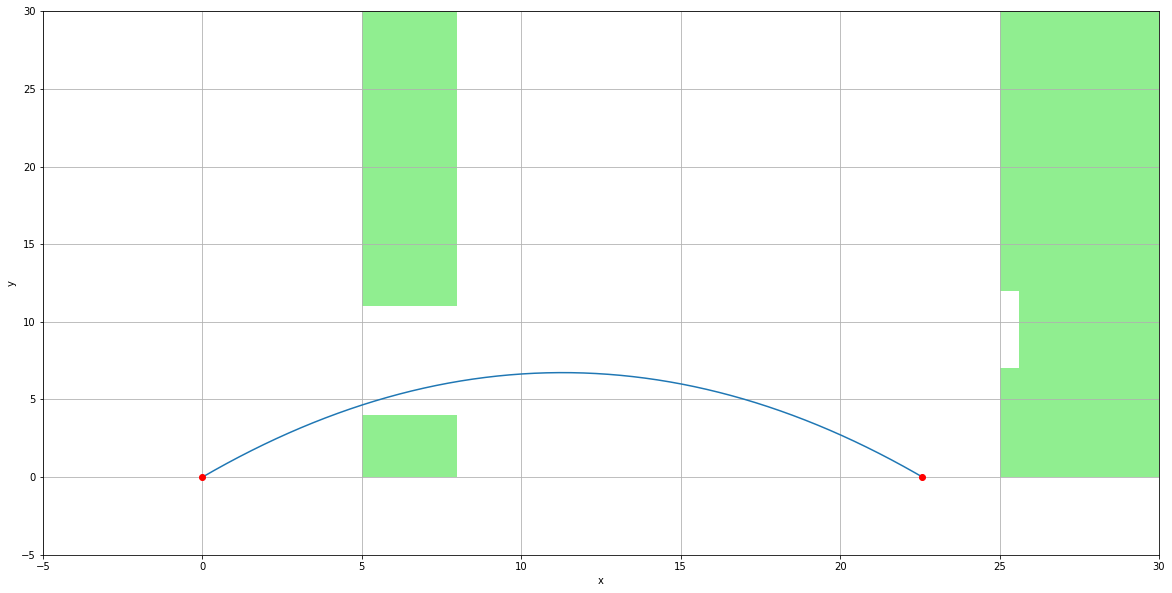

In [21]:
# 1
V0 = 15
alpha = 50
alpha = math.radians(alpha)
func(5,  3,  4,  7,  17,  7,  5,  alpha, V0)

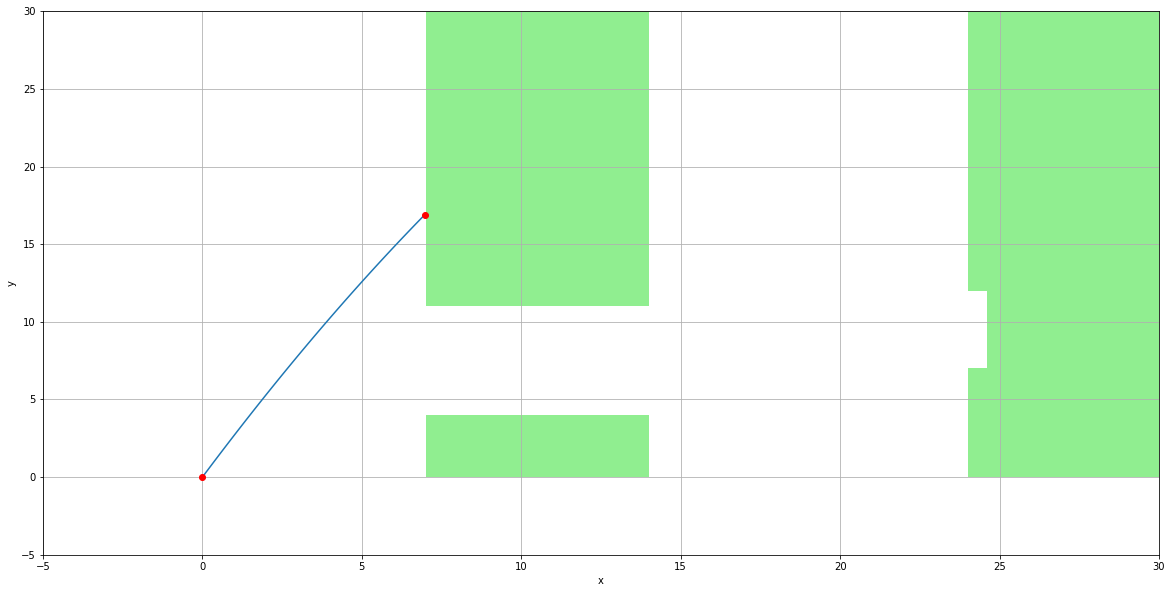

In [22]:
# 2
V0 = 30
alpha = 70
alpha = math.radians(alpha)
func(7,  7,  4,  7,  10,  7,  5,  alpha, V0)

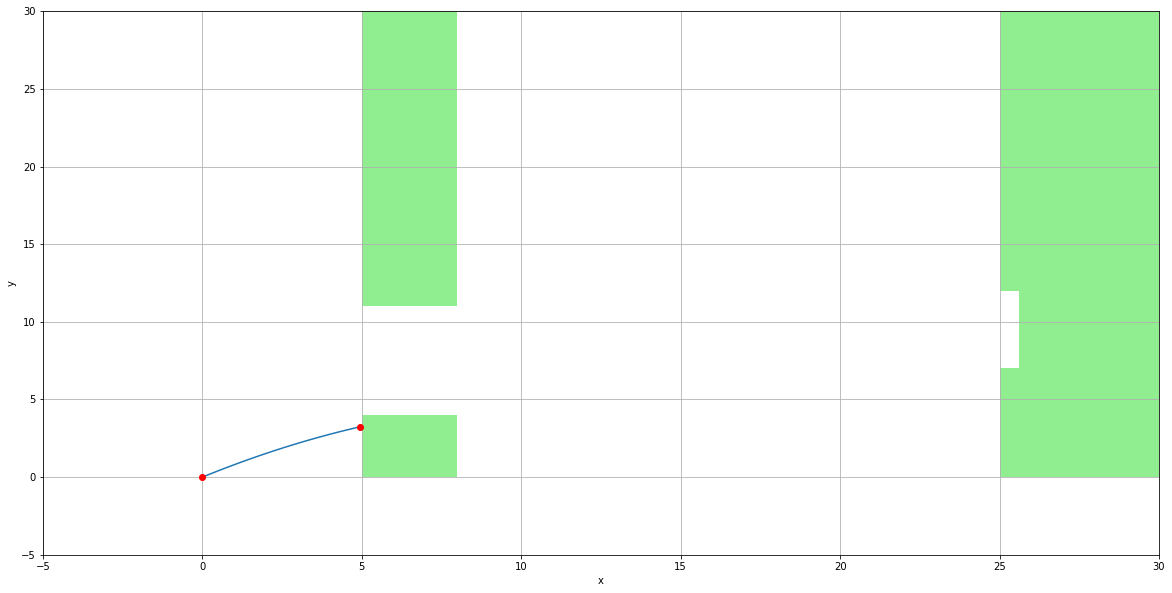

In [23]:
# 2
V0 = 15
alpha = 40
alpha = math.radians(alpha)
func(5,  3,  4,  7,  17,  7,  5,  alpha, V0)

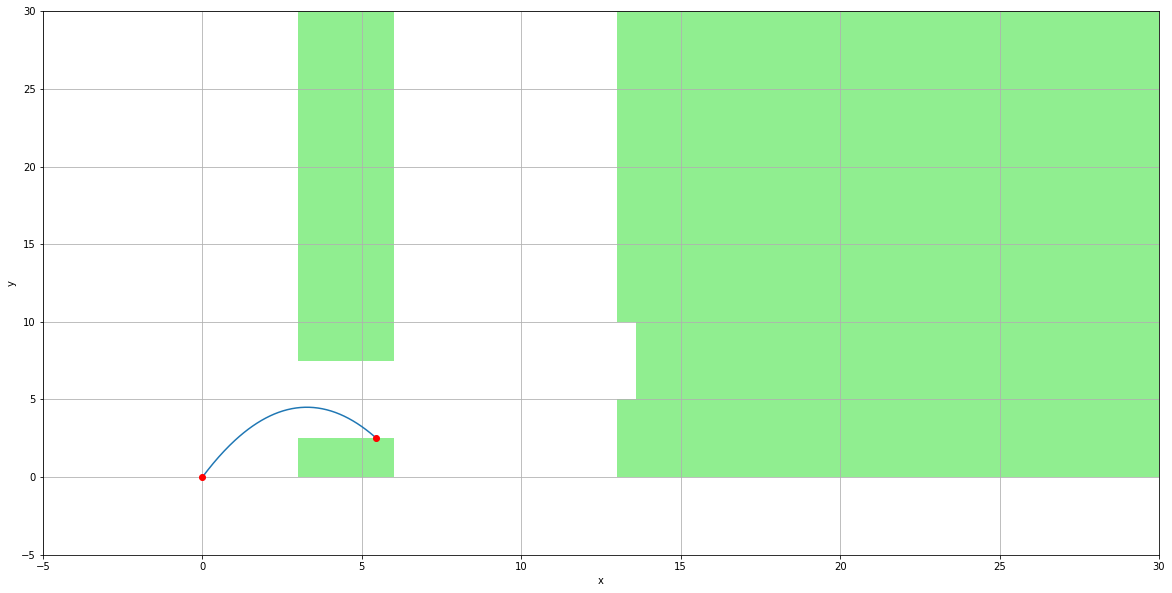

In [24]:
# 3.1
V0 = 10
alpha = 70
alpha = math.radians(alpha)
func(3,  3,  2.5,  5,  7,  5,  5,  alpha, V0)

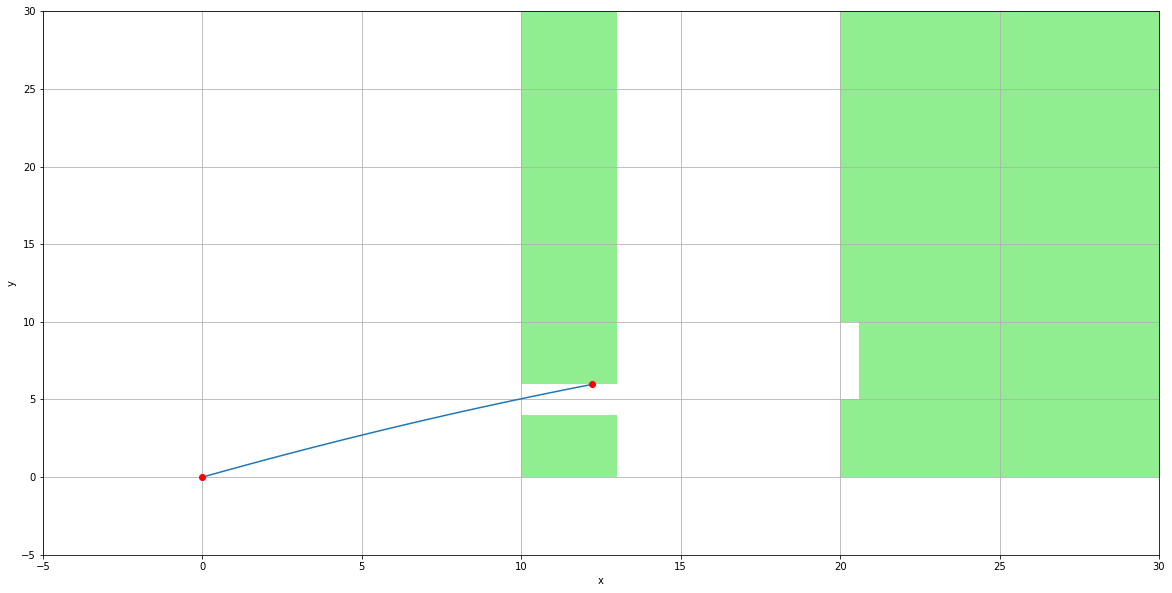

In [25]:
# 3.2
V0 = 30
alpha = 30
alpha = math.radians(alpha)
func(10,  3,  4,  2,  7,  5,  5,  alpha, V0)

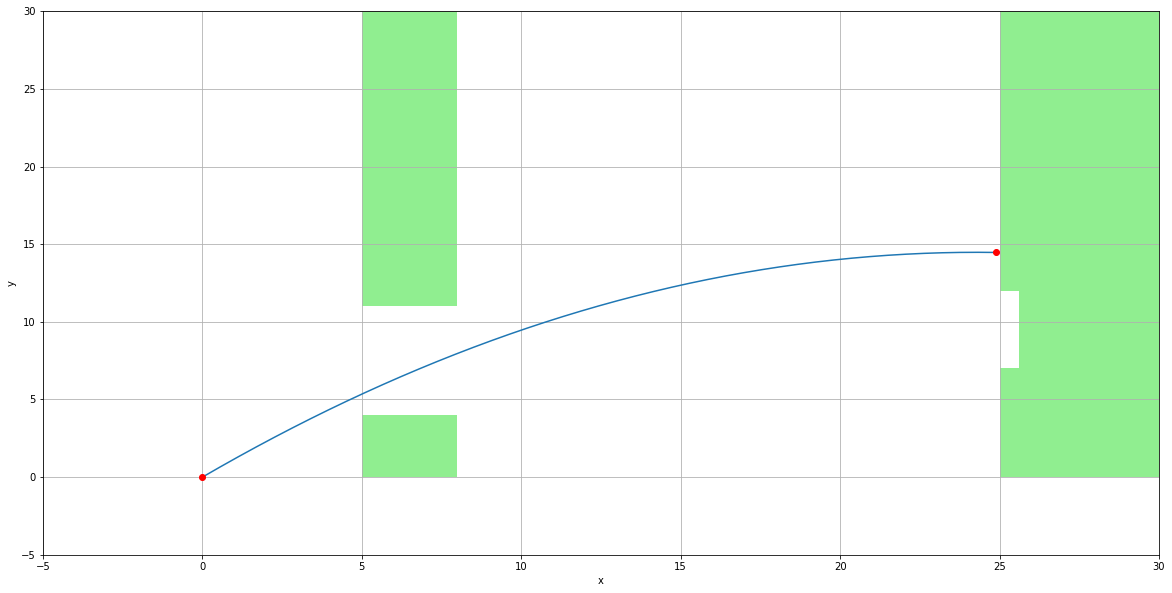

In [26]:
# 4
V0 = 22
alpha = 50
alpha = math.radians(alpha)
func(5,  3,  4,  7,  17,  7,  5,  alpha, V0)

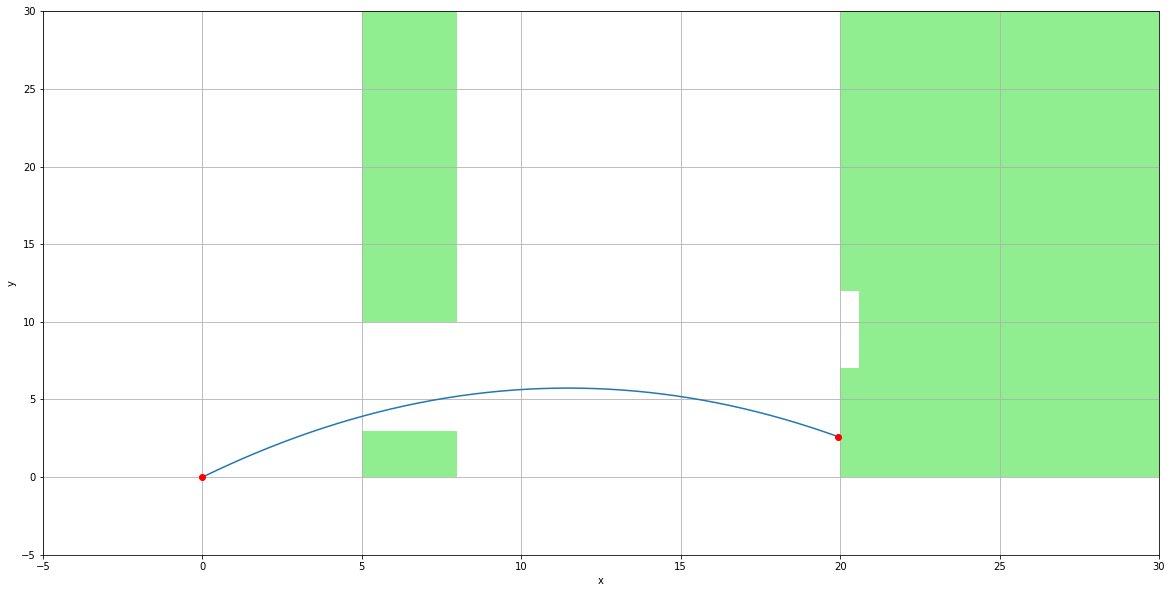

In [27]:
# 4
V0 = 15
alpha = 45
alpha = math.radians(alpha)
func(5,  3,  3,  7,  12,  7,  5,  alpha, V0)

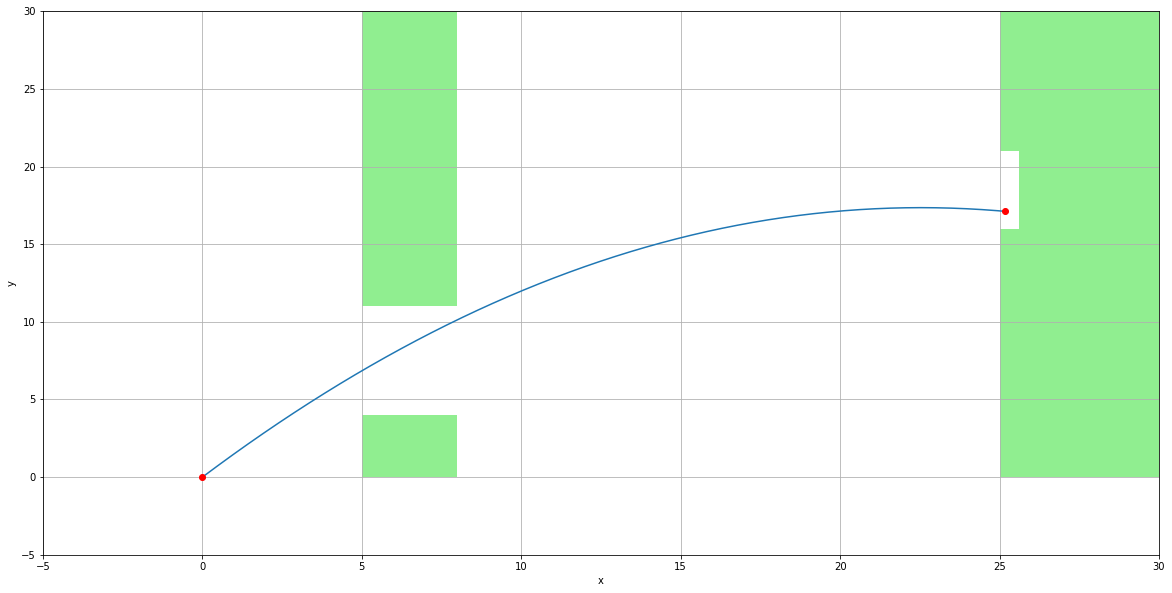

In [28]:
# 5
V0 = 22
alpha = 57
alpha = math.radians(alpha)
func(5,  3,  4,  7,  17,  16,  5,  alpha, V0)